In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("winequality-white.csv",sep=';')

In [5]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [6]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [7]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [9]:
df.duplicated().sum()

937

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
6      9.6        6

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop("quality",axis=1)
y=df["quality"]
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.10,random_state=10)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_predict = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.4659949622166247

In [29]:
model.score(X_train,y_train)

1.0

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
rf_pred = rf_clf.predict(X_test)
print("Random Forest Accuracy: " , accuracy_score(rf_pred, y_test) * 100, "%")

Random Forest Accuracy:  57.68261964735516 %


In [36]:
import xgboost
from xgboost import XGBClassifier
xg_clf = XGBClassifier(#learning_rate=0.001,
                            max_depth = 7, 
                            #n_estimators = 100,
                              scale_pos_weight=3,
                                max_delta_step = 5,subsample = 0.5 )




xg_clf.fit(X_train, y_train)

# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(xg_clf, X_test, y_test, cv=10)
# print(scores)




C:\Users\129577\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\129577\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=5, max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=3,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [33]:
xg_pred = xg_clf.predict(X_test)

print("XGBoost Classifier " , accuracy_score(xg_pred, y_test) * 100, "%")

XGBoost Classifier  54.15617128463476 %


C:\Users\129577\AppData\Roaming\Python\Python38\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [37]:
lr.fit(X_train,y_train) 

C:\Users\129577\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
lr_pred = lr.predict(X_test)
print("LogisticRegression Accuracy: " , accuracy_score(lr_pred, y_test) * 100, "%")

LogisticRegression Accuracy:  47.103274559193956 %


In [40]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [41]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=5)

In [42]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [43]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'best'}

In [45]:
model_best = DecisionTreeClassifier(criterion = 'gini',
 max_depth =  7,
 min_samples_leaf =  1,
 min_samples_split =  9,
 splitter =  'best')
model_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=9)

In [46]:
y_predict1 = model_best.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict1)

0.5188916876574308

In [2]:
from sklearn import tree
import matplotlib.pyplot as plt 

[Text(607.6487562703323, 800.8392857142857, 'X[10] <= 10.017\ngini = 0.674\nsamples = 3564\nvalue = [18, 132, 1054, 1616, 619, 120, 5]'),
 Text(218.53802648519405, 771.7178571428572, 'X[1] <= 0.237\ngini = 0.589\nsamples = 1415\nvalue = [8, 65, 703, 565, 67, 7, 0]'),
 Text(130.0943764943903, 742.5964285714285, 'X[0] <= 9.1\ngini = 0.583\nsamples = 434\nvalue = [3, 8, 128, 245, 44, 6, 0]'),
 Text(90.5069431671878, 713.475, 'X[1] <= 0.205\ngini = 0.571\nsamples = 420\nvalue = [1, 6, 121, 243, 43, 6, 0]'),
 Text(48.27892219974251, 684.3535714285714, 'X[9] <= 0.475\ngini = 0.55\nsamples = 258\nvalue = [0, 2, 60, 159, 32, 5, 0]'),
 Text(23.34835387162038, 655.2321428571429, 'X[9] <= 0.385\ngini = 0.592\nsamples = 148\nvalue = [0, 2, 46, 81, 16, 3, 0]'),
 Text(10.263012690822146, 626.1107142857143, 'X[0] <= 8.25\ngini = 0.369\nsamples = 44\nvalue = [0, 1, 8, 34, 0, 1, 0]'),
 Text(6.842008460548097, 596.9892857142856, 'X[9] <= 0.305\ngini = 0.273\nsamples = 38\nvalue = [0, 0, 5, 32, 0, 1, 0]'

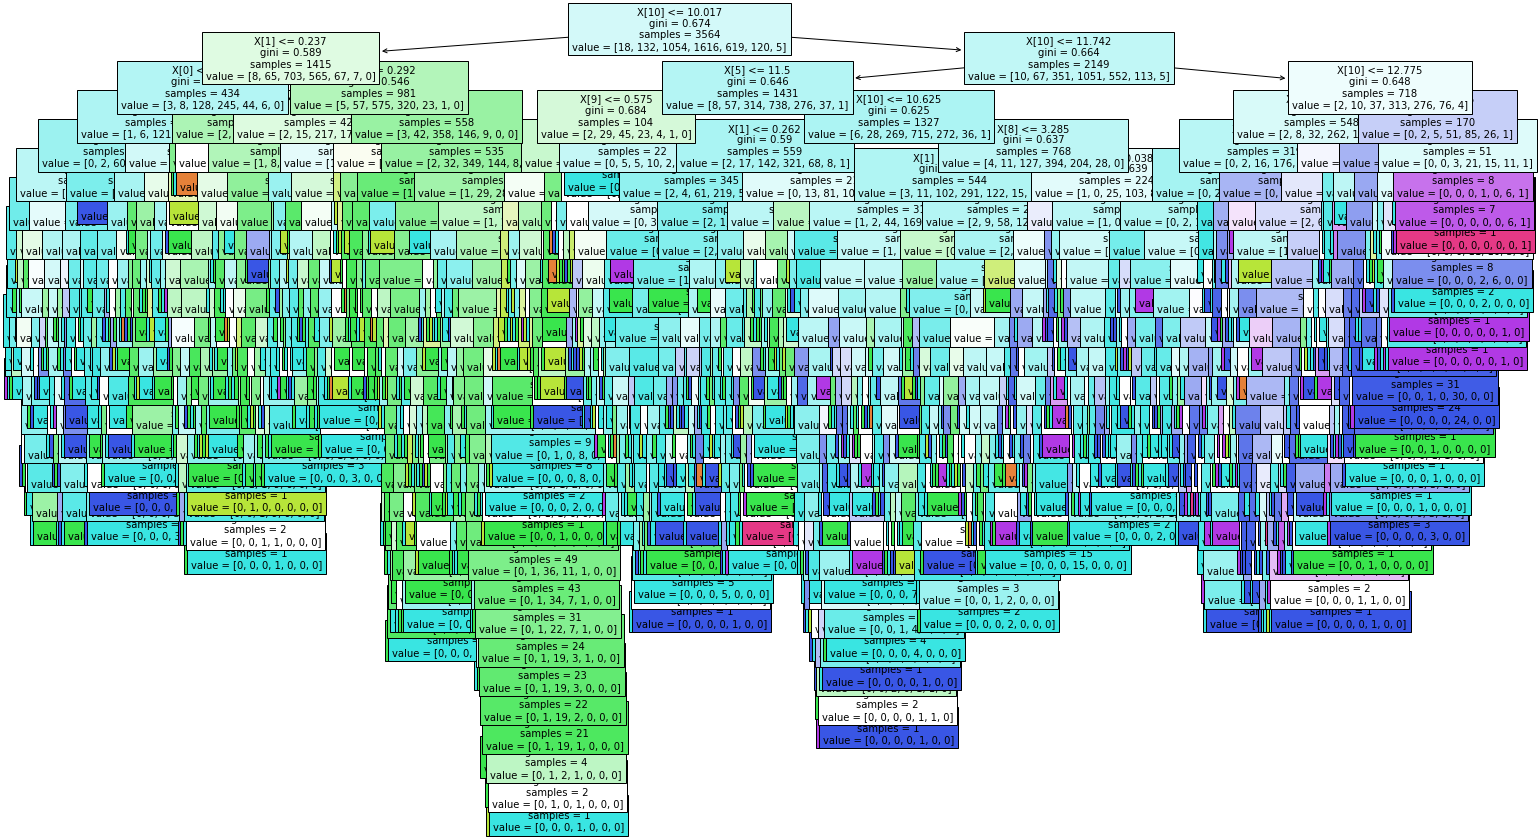

In [18]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True,fontsize=10)